# Cleaning and Sentiment Analysis
Analytics that can be done:
- Compare number of positive and negative sentiments across the competitors
- Compare positive and negative by the user type, local guide or non-local guide
- Analyse the topic (unigram and bigram), find out what they like and what they don't
- Find something to do with the wordcloud


## Open and EDA

In [ ]:
import pandas as pd
import numpy as np
import csv

In [ ]:
df = pd.read_csv("GR_Freshio Gelato Full Data (cleansed).xlsx - Sheet1.csv")
df

,Commentor,No_of_comment,comment_on,comments,cleansed_comments,Community Member
0,clarice sim,1 review,an hour ago,lovely old couple managing the restaurant! aun...,lovely old couple managing the restaurant aunt...,NaN
1,Adrian Gularek,23 reviews,an hour ago,"Super tasty icecreams, we had coconut, lychee,...",super tasty icecreams we had coconut lychee mango,NaN
2,Khoo Yin Qi,4 reviews,18 hours ago,Good hazelnut ice cream and generous tasting s...,good hazelnut ice cream and generous tasting s...,NaN
3,Michelle Low,· 20 reviews,2 days ago,Small ice cream shop with amazing gelato! They...,small ice cream shop with amazing gelato they ...,Local Guide
4,Aswin Anil,· 81 reviews,3 days ago,Friendly service!,friendly service,Local Guide
...,...,...,...,...,...,...
721,Tan Chee Yong,2 reviews,2 years ago,Must Try!!! Serve by friendly couple. Limited ...,must try serve by friendly couple limited seat...,NaN
722,Alicia Hong,· 12 reviews,2 years ago,Chance upon this shop while i was at City Gate...,chance upon this shop while i was at city gate...,Local Guide
723,Raymond Ma,3 reviews,2 years ago,Wait.. Is that a waffle? Maybe a croissant?\nI...,wait is that a waffle maybe a croissant\nits a...,NaN
724,Mg Lim,11 reviews,2 years ago,Friendly and hospitable couple who served us. ...,friendly and hospitable couple who served us k...,NaN


In [ ]:
df['cleansed_comments'] = df['cleansed_comments'].str.replace('\n', '')
df

,Commentor,No_of_comment,comment_on,comments,cleansed_comments,Community Member
0,clarice sim,1 review,an hour ago,lovely old couple managing the restaurant! aun...,lovely old couple managing the restaurant aunt...,NaN
1,Adrian Gularek,23 reviews,an hour ago,"Super tasty icecreams, we had coconut, lychee,...",super tasty icecreams we had coconut lychee mango,NaN
2,Khoo Yin Qi,4 reviews,18 hours ago,Good hazelnut ice cream and generous tasting s...,good hazelnut ice cream and generous tasting s...,NaN
3,Michelle Low,· 20 reviews,2 days ago,Small ice cream shop with amazing gelato! They...,small ice cream shop with amazing gelato they ...,Local Guide
4,Aswin Anil,· 81 reviews,3 days ago,Friendly service!,friendly service,Local Guide
...,...,...,...,...,...,...
721,Tan Chee Yong,2 reviews,2 years ago,Must Try!!! Serve by friendly couple. Limited ...,must try serve by friendly couple limited seat...,NaN
722,Alicia Hong,· 12 reviews,2 years ago,Chance upon this shop while i was at City Gate...,chance upon this shop while i was at city gate...,Local Guide
723,Raymond Ma,3 reviews,2 years ago,Wait.. Is that a waffle? Maybe a croissant?\nI...,wait is that a waffle maybe a croissantits a c...,NaN
724,Mg Lim,11 reviews,2 years ago,Friendly and hospitable couple who served us. ...,friendly and hospitable couple who served us k...,NaN


In [ ]:
df2 = df[["cleansed_comments", "Community Member"]]
df2

,cleansed_comments,Community Member
0,lovely old couple managing the restaurant aunt...,NaN
1,super tasty icecreams we had coconut lychee mango,NaN
2,good hazelnut ice cream and generous tasting s...,NaN
3,small ice cream shop with amazing gelato they ...,Local Guide
4,friendly service,Local Guide
...,...,...
721,must try serve by friendly couple limited seat...,NaN
722,chance upon this shop while i was at city gate...,Local Guide
723,wait is that a waffle maybe a croissantits a c...,NaN
724,friendly and hospitable couple who served us k...,NaN


## Pre-processing

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

porter = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Drop if empty
df2.dropna(subset=['cleansed_comments'], inplace=True)

<ipython-input-6-6df35c8d0a1c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(subset=['cleansed_comments'], inplace=True)


In [ ]:
def preprocess_text(text):
    text = text.lower()
    words = word_tokenize(text)

    # Remove stopwords, perform stemming, and handle contractions
    filtered_words = [porter.stem(word) for word in words if word.lower() not in stop_words]

    # Join the words back into a string
    processed_text = ' '.join(filtered_words)

    # Handle contractions (expanding them)
    processed_text = expand_contractions(processed_text)

    return processed_text

# Function to expand contractions
def expand_contractions(text):
    # Dictionary of common contractions and their expansions
    contractions_dict = {
        "can't": "cannot",
        "n't": "not",
        "'ve": "have",
        "'ll": "will",
        "'re": "are",
        "'d": "would",
        "'s": "is",
        "'m": "am"
    }
    # Regular expression pattern to match contractions
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        expanded_contraction = contractions_dict.get(match) if contractions_dict.get(match) else contractions_dict.get(match.lower())
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    return expanded_text

In [ ]:
# Remove Stop Words
def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df2['cleansed_comments'] = df2['cleansed_comments'].apply(remove_stopwords)

<ipython-input-8-a482558fb399>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cleansed_comments'] = df2['cleansed_comments'].apply(remove_stopwords)


In [ ]:
df2['cleansed_comments'] = df2['cleansed_comments'].apply(preprocess_text)

<ipython-input-9-ae5e16f5c701>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cleansed_comments'] = df2['cleansed_comments'].apply(preprocess_text)


In [ ]:
df2

,cleansed_comments,Community Member
0,love old coupl manag restaur aunti welcom gave...,NaN
1,super tasti icecream coconut lyche mango,NaN
2,good hazelnut ice cream gener tast sampl,NaN
3,small ice cream shop amaz gelato 16 flavour on...,Local Guide
4,friendli servic,Local Guide
...,...,...
721,must tri serv friendli coupl limit seat friend...,NaN
722,chanc upon shop citi gate friendli uncl offer ...,Local Guide
723,wait waffl mayb croissantit cruffl,NaN
724,friendli hospit coupl serv us koreanstyl cafe ...,NaN


## Sentiment Analysis

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
def get_sentiment_scores(text):
    # Get the sentiment scores using VADER
    scores = sid.polarity_scores(text)
    return scores

In [ ]:
df2['sentiment_scores'] = df2['cleansed_comments'].apply(get_sentiment_scores)
df2['compound_sentiment'] = df2['sentiment_scores'].apply(lambda x: x['compound'])

<ipython-input-12-e7079b460e47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['sentiment_scores'] = df2['cleansed_comments'].apply(get_sentiment_scores)
<ipython-input-12-e7079b460e47>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['compound_sentiment'] = df2['sentiment_scores'].apply(lambda x: x['compound'])


In [ ]:
# Classify based on compound score
def classify_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.4:
        return 'negative'
    else:
        return 'neutral'

In [ ]:
# Apply sentiment classification
df2['sentiment'] = df2['compound_sentiment'].apply(classify_sentiment)

# Print the updated DataFrame with sentiment analysis results
print(df2[['cleansed_comments', 'compound_sentiment', 'sentiment']])

                                     cleansed_comments  compound_sentiment  \
0    love old coupl manag restaur aunti welcom gave...              0.6369   
1             super tasti icecream coconut lyche mango              0.5994   
2             good hazelnut ice cream gener tast sampl              0.4404   
3    small ice cream shop amaz gelato 16 flavour on...              0.6249   
4                                      friendli servic              0.0000   
..                                                 ...                 ...   
721  must tri serv friendli coupl limit seat friend...              0.6369   
722  chanc upon shop citi gate friendli uncl offer ...              0.6369   
723                 wait waffl mayb croissantit cruffl              0.0000   
724  friendli hospit coupl serv us koreanstyl cafe ...              0.0000   
725   baileysgelato freshiogelatoamericano4th may 2021              0.0000   

    sentiment  
0    positive  
1    positive  
2    positive  

<ipython-input-14-f88c29e8b08c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['sentiment'] = df2['compound_sentiment'].apply(classify_sentiment)


In [ ]:
negative_sentiment_df = df2[df2['sentiment'] == 'negative']
for comment in negative_sentiment_df['cleansed_comments']:
    print("Comments:" + str(comment))

Comments:5 establish worst servic ever cheat money order cappuccino dont know took order wrongli charg wrongli happen anyway pay lesser attitud tone choic
Comments:wonder craft premium gelato rum raisin gener alcohol pistachio smooth depth flavor truli master art make gelato cant help beam pride know local gelato master


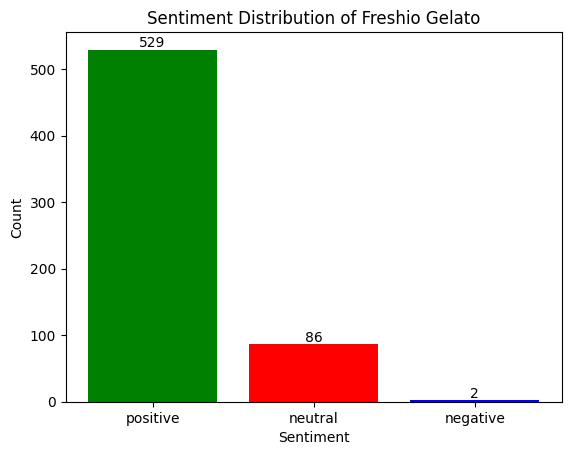

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment
sentiment_counts = df2['sentiment'].value_counts()

# Plot the sentiment distribution
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution of Freshio Gelato')

for index, value in enumerate(sentiment_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

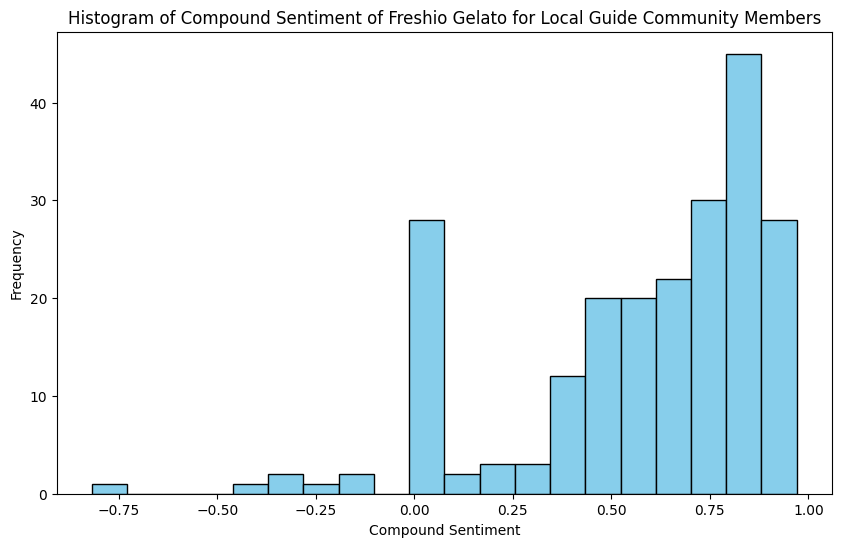

In [ ]:
# Plot historgram by Local Guide

local_guide_sentiments = df2[df2['Community Member'] == 'Local Guide']['compound_sentiment']

# Plotting a histogram for the sentiment scores of 'Local Guide'
plt.figure(figsize=(10, 6))
plt.hist(local_guide_sentiments, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Compound Sentiment')
plt.ylabel('Frequency')
plt.title('Histogram of Compound Sentiment of Freshio Gelato for Local Guide Community Members')
plt.show()


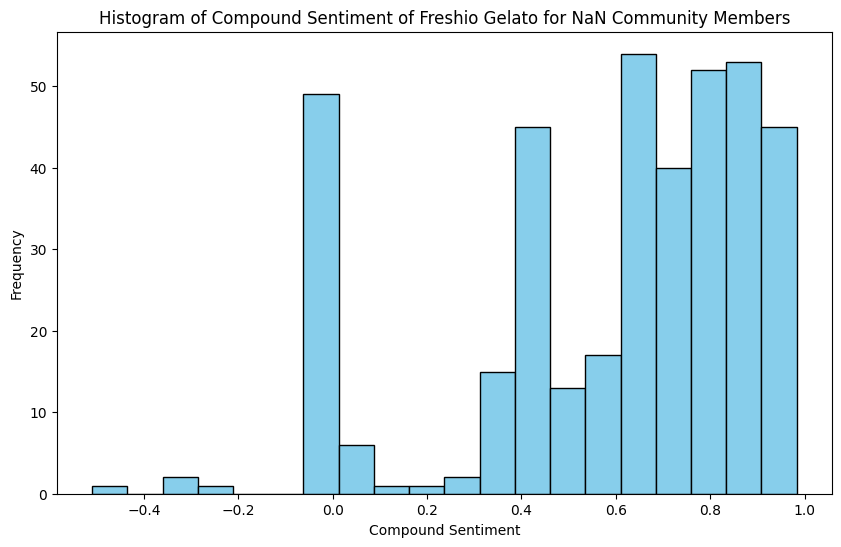

In [ ]:
# Plot histogram for NaN (Normal Members)

nan_sentiments = df2[df2['Community Member'].isna()]['compound_sentiment']

# Plotting a histogram for the sentiment scores of NaN community members
plt.figure(figsize=(10, 6))
plt.hist(nan_sentiments, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Compound Sentiment')
plt.ylabel('Frequency')
plt.title('Histogram of Compound Sentiment of Freshio Gelato for NaN Community Members')
plt.show()

## Topic Modelling
We will try 5 topic then 3 topic

Topics:
Topic 0: 0.051*"cream" + 0.050*"ice" + 0.024*"good" + 0.022*"uncl" + 0.021*"tri" + 0.021*"friendli" + 0.020*"flavour" + 0.019*"owner" + 0.018*"us" + 0.016*"gelato"
Topic 1: 0.043*"gelato" + 0.034*"flavour" + 0.026*"uncl" + 0.018*"friendli" + 0.016*"shop" + 0.014*"owner" + 0.013*"tri" + 0.012*"best" + 0.012*"tast" + 0.012*"cream"
Topic 2: 0.014*"tri" + 0.009*"5" + 0.009*"uncl" + 0.009*"aunti" + 0.008*"place" + 0.007*"googl" + 0.007*"friendli" + 0.006*"step" + 0.006*"servic" + 0.006*"flavour"
Topic 3: 0.026*"coupl" + 0.024*"cream" + 0.024*"ice" + 0.017*"love" + 0.015*"gelato" + 0.013*"friendli" + 0.010*"tri" + 0.010*"best" + 0.009*"great" + 0.009*"run"
Topic 4: 0.049*"gelato" + 0.032*"uncl" + 0.028*"friendli" + 0.024*"flavour" + 0.018*"us" + 0.017*"sampl" + 0.015*"place" + 0.014*"aunti" + 0.014*"tri" + 0.013*"servic"


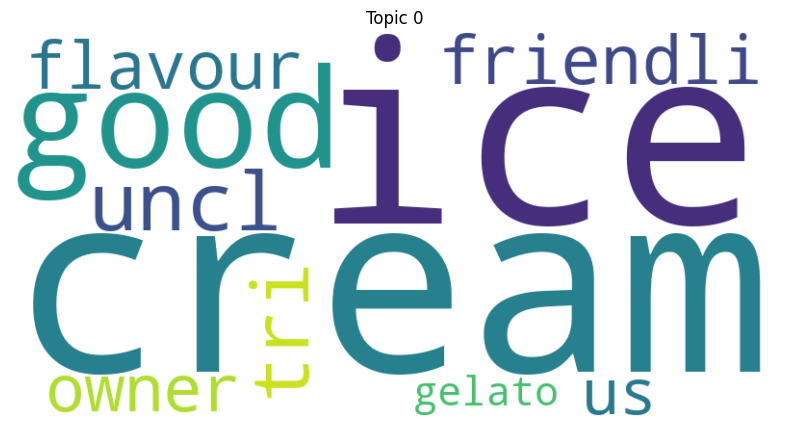

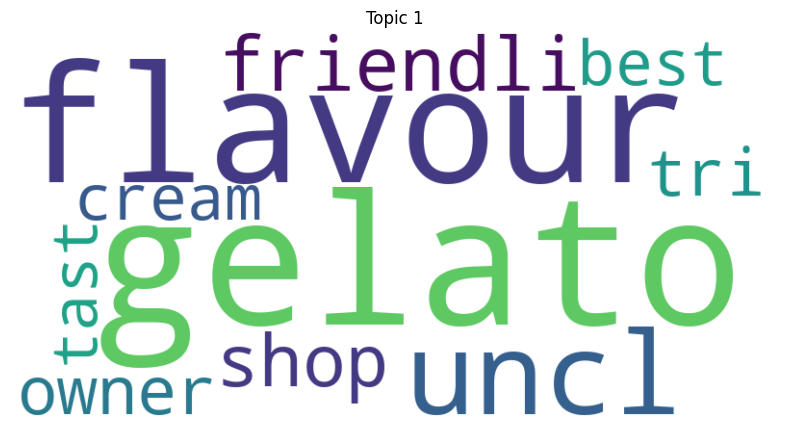

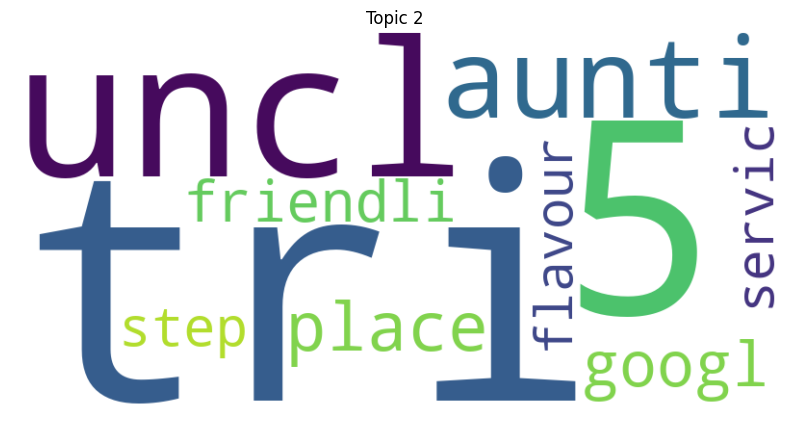

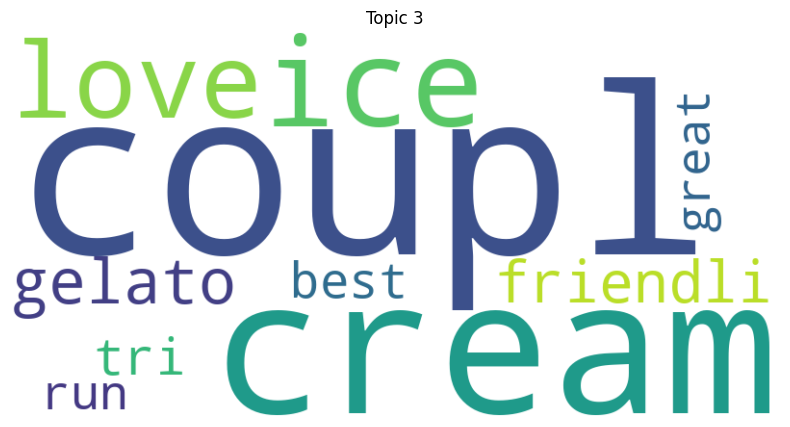

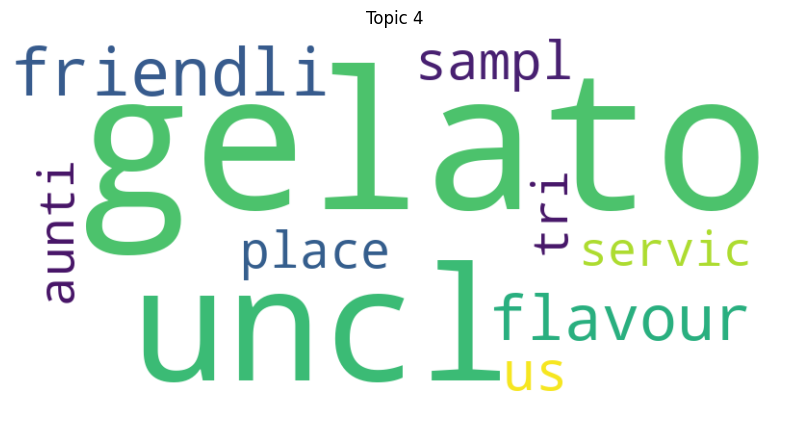

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import numpy as np

# Preprocess the text (assuming df2 is your DataFrame)
texts = df2['cleansed_comments'].tolist()

# Tokenize and clean the text
tokenized_texts = [text.split() for text in texts]

# Create a dictionary and a corpus
dictionary = corpora.Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

# Build the LDA model
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Display the topics
print("Topics:")
for topic_id, words in lda_model.print_topics():
    print(f"Topic {topic_id}: {words}")

# Visualize the topics
topics = lda_model.show_topics(formatted=False)
wordcloud = WordCloud(width=800, height=400, background_color='white')

for topic_id, words in topics:
    wordcloud.generate_from_frequencies(dict(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic_id}')
    plt.axis('off')
    plt.show()


### From the topic above, we can infer that
**Topic 0: Gelato Varieties**
- Chocolate, Pistachio flavours

**Topic 1: Customer Experience**
- Service is top notch and the memorable factor

**Topic 2: Ice Cream Shop and Customer Experience**
- Good customer experience, similar to topic 1

**Topic 3: Gelato Experience and Place**
- Similar to topic 1

**Topic 4: Gelato Flavors and Sampling**
- Variety of flavours are great
- Sampling seems to help customer find their favourite flavour



Topics:
Topic 0: 0.048*"cream" + 0.047*"ice" + 0.026*"friendli" + 0.019*"uncl" + 0.016*"gelato" + 0.015*"flavour" + 0.014*"owner" + 0.013*"good" + 0.013*"nice" + 0.013*"coupl"
Topic 1: 0.042*"gelato" + 0.032*"flavour" + 0.030*"uncl" + 0.024*"friendli" + 0.022*"tri" + 0.016*"good" + 0.016*"super" + 0.016*"aunti" + 0.015*"recommend" + 0.014*"gener"
Topic 2: 0.041*"gelato" + 0.024*"uncl" + 0.023*"us" + 0.020*"flavour" + 0.016*"tri" + 0.015*"sampl" + 0.013*"friendli" + 0.012*"aunti" + 0.012*"mani" + 0.011*"even"


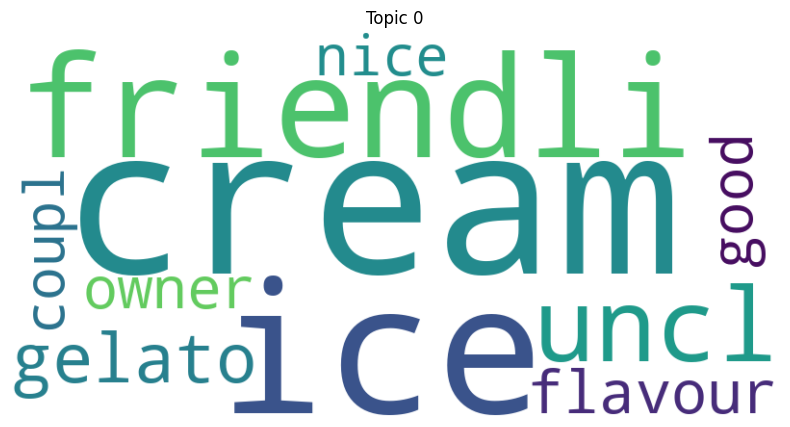

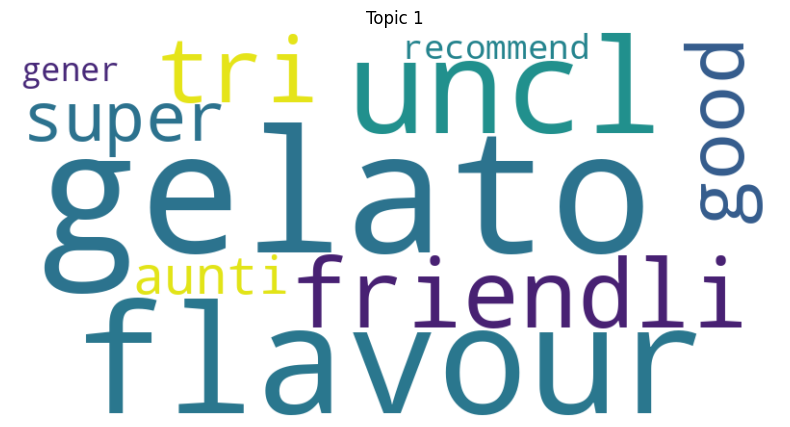

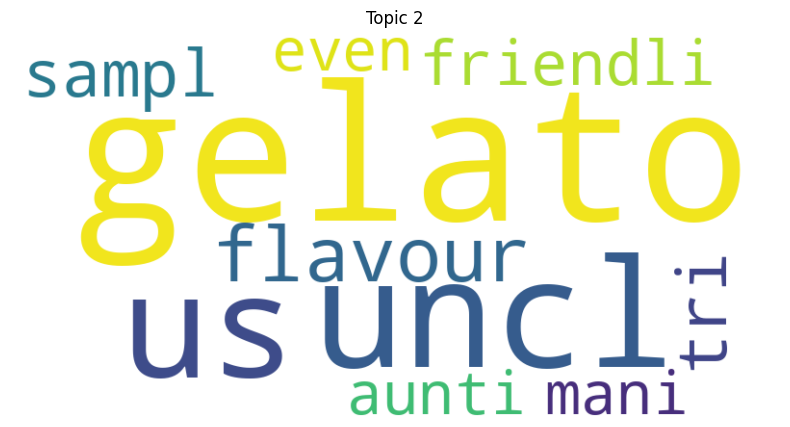

In [ ]:
# 3 topic
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import numpy as np

# Preprocess the text (assuming df2 is your DataFrame)
texts = df2['cleansed_comments'].tolist()

# Tokenize and clean the text
tokenized_texts = [text.split() for text in texts]

# Create a dictionary and a corpus
dictionary = corpora.Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

# Build the LDA model
lda_model = LdaModel(corpus, num_topics=3, id2word=dictionary, passes=10)

# Display the topics
print("Topics:")
for topic_id, words in lda_model.print_topics():
    print(f"Topic {topic_id}: {words}")

# Visualize the topics
topics = lda_model.show_topics(formatted=False)
wordcloud = WordCloud(width=800, height=400, background_color='white')

for topic_id, words in topics:
    wordcloud.generate_from_frequencies(dict(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic_id}')
    plt.axis('off')
    plt.show()


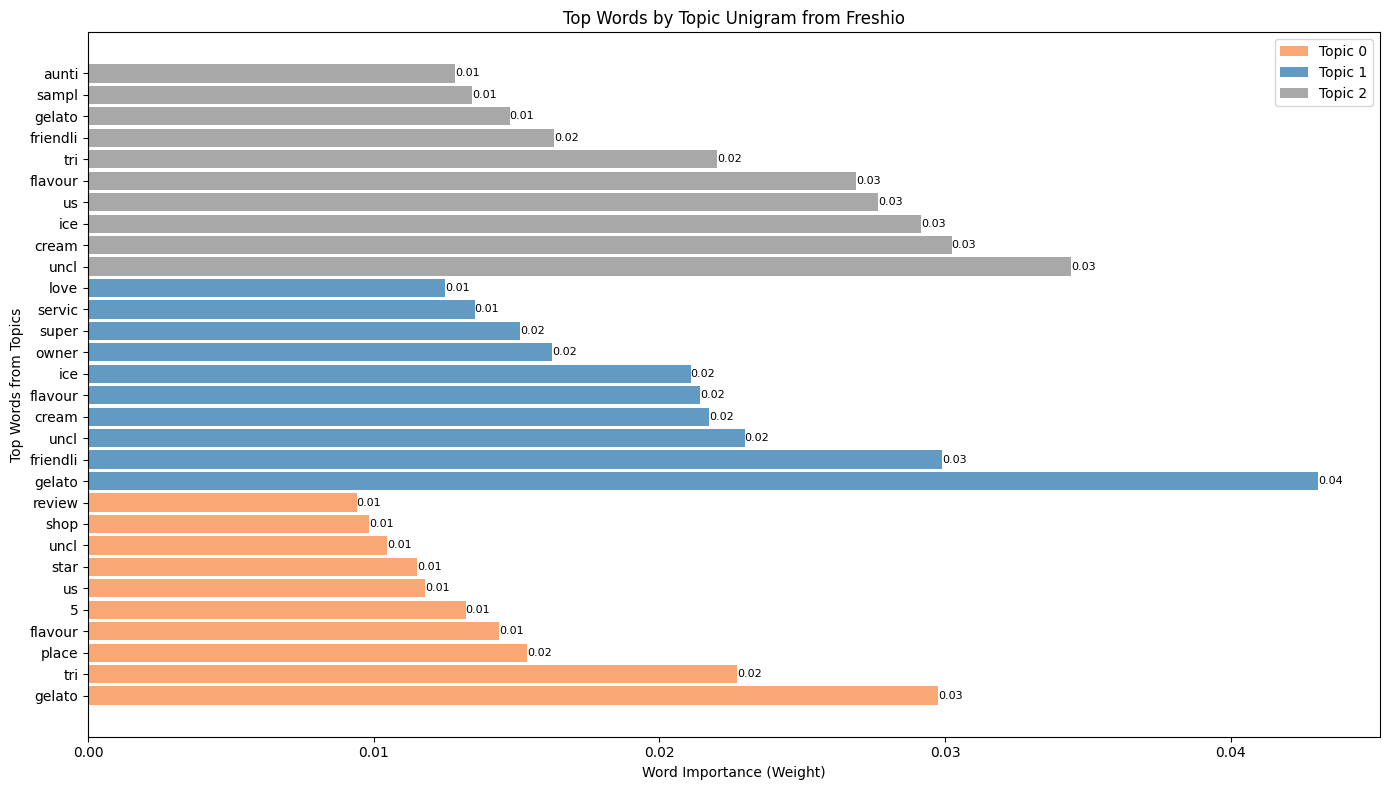

In [ ]:
# Assuming the LDA model has been created and trained as per the code above

# Set up the plot dimensions and configurations
fig, ax = plt.subplots(figsize=(14, 8))
bar_width = 0.85  # Width of the bars

# Colors for different topics in shades of orange, blue, and grey
colors = ['#f9a875', '#619ac3', '#a8a8a8']  # Orange, Blue, Grey

# Number of top words to display for each topic
top_n = 10

# Extract the top words and their weights
top_words = {topic_id: lda_model.show_topic(topic_id, topn=top_n) for topic_id in range(lda_model.num_topics)}

# Store the words and their positions for labeling on the y-axis
tick_labels = []
positions = []

# Starting position for the first topic's bars
current_position = 0

# Iterate over each topic to plot the bars
for topic_id, words_data in top_words.items():
    words, weights = zip(*words_data)  # Unpack the words and their corresponding weights

    # Plot the bars for the current topic's words
    bars = ax.barh(current_position + np.arange(top_n), weights, bar_width, label=f'Topic {topic_id}', color=colors[topic_id % len(colors)])

    # Annotate the bars with the score
    for bar, score in zip(bars, weights):
        ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{score:.2f}',
                va='center', ha='left', fontsize=8)

    # Add the words to the tick_labels list for the y-axis
    tick_labels.extend(words)

    # Update the positions for y-ticks
    positions.extend(current_position + np.arange(top_n))

    # Update the starting position for the next topic
    current_position += top_n

# Set the y-ticks to be in the middle of the bars for each topic
ax.set_yticks(positions)
ax.set_yticklabels(tick_labels)

# Set the labels and title of the plot
ax.set_xlabel('Word Importance (Weight)')
ax.set_ylabel('Top Words from Topics')
ax.set_title('Top Words by Topic Unigram from Freshio')

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()  # Adjust the layout to fit everything
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
<ipython-input-97-61e0aa687b5a>:42: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(jsd_matrix, 'ward')


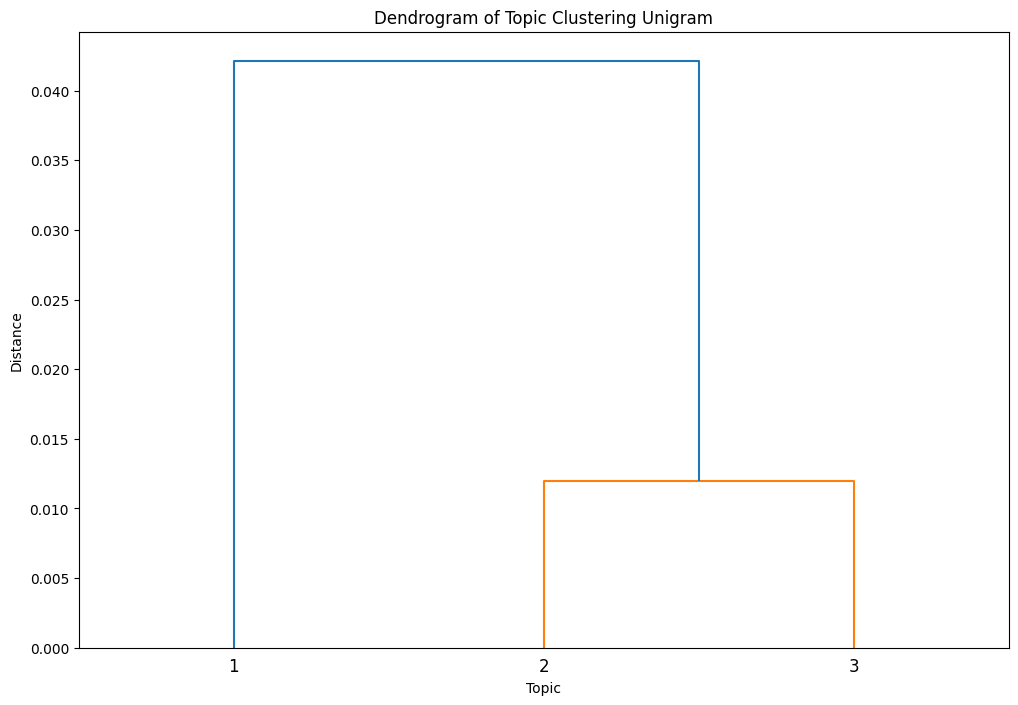

In [ ]:

def jsd(p, q):
    # Calculate Jensen-Shannon Divergence
    p = np.asarray(p)
    q = np.asarray(q)
    m = 0.5 * (p + q)
    return 0.5 * (entropy(p, m) + entropy(q, m))

# Number of topics
num_topics = lda_model.num_topics

# Get the topic distribution for all topics
topic_distributions = [lda_model.show_topic(topicid, topn=len(dictionary)) for topicid in range(num_topics)]
topic_distributions_probs = [[word_probability for _, word_probability in topic_distribution] for topic_distribution in topic_distributions]

# Initialize an empty matrix
jsd_matrix = np.zeros((num_topics, num_topics))

# Populate the JSD matrix with the Jensen-Shannon Divergence values
for i in range(num_topics):
    for j in range(num_topics):
        # As JSD is symmetric, no need to calculate it twice
        if i < j:
            divergence = jsd(topic_distributions_probs[i], topic_distributions_probs[j])
            jsd_matrix[i, j] = divergence
            jsd_matrix[j, i] = divergence

# Now you have a JSD matrix defined, continue with MDS
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Perform MDS
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
mds_coords = mds.fit_transform(jsd_matrix)  # Apply MDS to the JSD matrix

# Calculate scaled sizes
topic_sizes = [100 * lda_model.state.get_lambda()[i].sum() for i in range(num_topics)]

### Jenson-Shannon Divergence Matrix
from scipy.cluster.hierarchy import linkage, dendrogram

# Use the Jensen-Shannon divergence matrix to perform hierarchical clustering
Z = linkage(jsd_matrix, 'ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=range(1, num_topics+1))
plt.title('Dendrogram of Topic Clustering Unigram')
plt.xlabel('Topic')
plt.ylabel('Distance')
plt.show()

# ### T-SNE Plot
# from sklearn.manifold import MDS

# # Assume jsd_matrix is your precomputed Jensen-Shannon divergence matrix
# mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
# mds_coords = mds.fit_transform(jsd_matrix)

# # Plot the results
# plt.figure(figsize=(10, 8))
# plt.scatter(mds_coords[:, 0], mds_coords[:, 1])
# for i, (x, y) in enumerate(mds_coords):
#     plt.text(x, y, f'Topic {i + 1}')
# plt.title('MDS Plot of Topic Distances')
# plt.xlabel('MDS Dimension 1')
# plt.ylabel('MDS Dimension 2')
# plt.show()

In [ ]:
import pandas as pd
import re

# Your topics string
topics_str = """
Topic 0: 0.031*"gelato" + 0.025*"uncl" + 0.019*"friendli" + 0.017*"sampl" + 0.015*"back" + 0.014*"tri" + 0.013*"good" + 0.013*"come" + 0.013*"flavour" + 0.012*"us"
Topic 1: 0.046*"gelato" + 0.023*"uncl" + 0.016*"flavour" + 0.015*"friendli" + 0.014*"us" + 0.013*"super" + 0.013*"tri" + 0.011*"gener" + 0.011*"chocol" + 0.010*"place"
Topic 2: 0.040*"cream" + 0.039*"ice" + 0.031*"flavour" + 0.027*"friendli" + 0.025*"uncl" + 0.022*"gelato" + 0.019*"tri" + 0.018*"owner" + 0.016*"us" + 0.013*"good"
"""

# Split the string into individual topics
topics = topics_str.strip().split('\n')

# Initialize an empty dictionary to hold the data
data = {}

# Process each topic
for topic in topics:
    # Extract the topic number
    topic_num = "Topic " + re.search(r"Topic (\d+):", topic).group(1)

    # Find all score-word pairs
    pairs = re.findall(r"(\d\.\d{3})\*\"(\w+)\"", topic)

    # Transpose the pairs to fit the desired format
    scores, words = zip(*pairs)

    # Add the scores and words to the dictionary under the topic number
    data[f'{topic_num} score'] = scores
    data[f'{topic_num} word'] = words

# Convert the dictionary into a DataFrame
df_transposed = pd.DataFrame(data)

# Transpose the DataFrame so each topic is a column
#df_transposed = df_transposed.T

df_transposed


,Topic 0 score,Topic 0 word,Topic 1 score,Topic 1 word,Topic 2 score,Topic 2 word
0,0.031,gelato,0.046,gelato,0.040,cream
1,0.025,uncl,0.023,uncl,0.039,ice
2,0.019,friendli,0.016,flavour,0.031,flavour
3,0.017,sampl,0.015,friendli,0.027,friendli
4,0.015,back,0.014,us,0.025,uncl
5,0.014,tri,0.013,super,0.022,gelato
6,0.013,good,0.013,tri,0.019,tri
7,0.013,come,0.011,gener,0.018,owner
8,0.013,flavour,0.011,chocol,0.016,us
9,0.012,us,0.010,place,0.013,good


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

sentiment_groups = df2.groupby('sentiment')['cleansed_comments'].apply(lambda x: ' '.join(x)).to_dict()

# Create the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=1000, stop_words='english')

# Fit and transform the cleansed comments
tfidf_matrix = tfidf_vectorizer.fit_transform(df2['cleansed_comments'])

# Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get the top n phrases for each review
top_n = 10
res_grp = {
    'positive': [],
    'neutral': [],
    'negative':[]
}

# Iterate through sentiment_groups and extract top phrases
for sentiment, comments in sentiment_groups.items():
    # Fit and transform the merged comments for each sentiment group
    tfidf_matrix = tfidf_vectorizer.fit_transform([comments])
    feature_names = tfidf_vectorizer.get_feature_names_out()

    # Get the top phrases
    feature_index = tfidf_matrix[0, :].nonzero()[1]
    tfidf_scores = zip(feature_index, [tfidf_matrix[0, x] for x in feature_index])
    top_phrases = [feature_names[i] for i, _ in sorted(tfidf_scores, key=lambda x: x[1], reverse=True)[:top_n]]

    # Append the top phrases to the corresponding sentiment group in res_grp
    res_grp[sentiment.lower()].append(top_phrases)

# Display the top phrases for each sentiment group
for sentiment, top_phrases_list in res_grp.items():
    print(f"Sentiment: {sentiment.capitalize()}")
    for i, phrases in enumerate(top_phrases_list):
        print(f"Top Phrases for review {i+1}: {', '.join(phrases)}")
    print('\n')


Sentiment: Positive
Top Phrases for review 1: gelato, uncl, flavour, friendli, cream, ice, tri, good, owner, super


Sentiment: Neutral
Top Phrases for review 1: gelato, friendli, flavour, cream, ice, uncl, tri, amaz, gener, delici


Sentiment: Negative
Top Phrases for review 1: gelato, master, wrongli, know, order, local, pride, beam, help, make




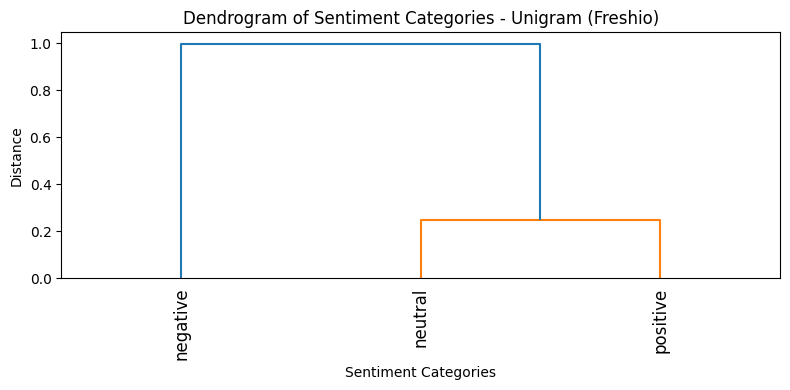

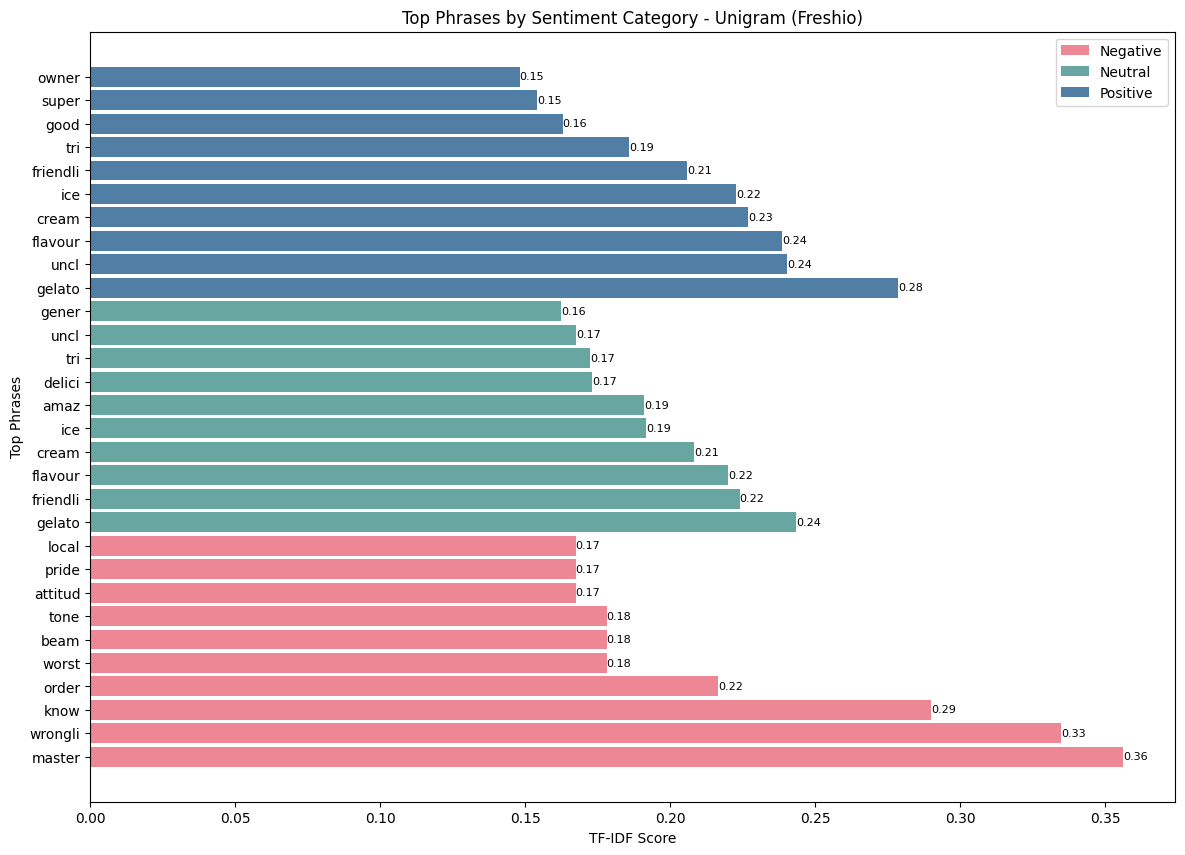

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df2 is your DataFrame and 'cleansed_comments' & 'sentiment' are columns in df2

# Create the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=1000, stop_words='english')

# Fit the TF-IDF vectorizer on all cleansed comments to get consistent feature space
tfidf_vectorizer.fit(df2['cleansed_comments'])

# Create an empty DataFrame to hold the feature space for each sentiment
tfidf_feature_df = pd.DataFrame(columns=tfidf_vectorizer.get_feature_names_out())

# Iterate through sentiment_groups and create a TF-IDF row for each
for sentiment, comments in sentiment_groups.items():
    # Transform the merged comments for each sentiment group
    tfidf_vector = tfidf_vectorizer.transform([comments])
    tfidf_feature_df.loc[sentiment] = tfidf_vector.toarray().flatten()

# Now tfidf_feature_df contains the TF-IDF scores for each sentiment's top phrases

# Calculate the pairwise distance matrix using cosine distance (1 - cosine similarity)
distance_matrix = pdist(tfidf_feature_df, 'cosine')

# Perform Hierarchical Clustering
Z = linkage(distance_matrix, 'ward')  # You can use other methods like 'average', 'complete', etc.

# Create the Dendrogram
plt.figure(figsize=(8, 4))
dendrogram(Z, labels=tfidf_feature_df.index, leaf_rotation=90, leaf_font_size=12)
plt.title('Dendrogram of Sentiment Categories - Unigram (Freshio)')
plt.xlabel('Sentiment Categories')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

# import numpy as np

# # Let's assume you want to plot the top n phrases for each sentiment
# top_n = 10

# # For each sentiment category
# for sentiment in tfidf_feature_df.index:
#     # Sort the features by importance for each sentiment category
#     sorted_indices = np.argsort(tfidf_feature_df.loc[sentiment])[::-1]
#     top_features = tfidf_feature_df.columns[sorted_indices[:top_n]]
#     top_scores = tfidf_feature_df.loc[sentiment][sorted_indices[:top_n]]

#     # Plotting
#     plt.figure(figsize=(10, 6))
#     plt.barh(top_features, top_scores, color='skyblue')
#     plt.xlabel('TF-IDF Score')
#     plt.title(f'Top {top_n} phrases for {sentiment} Sentiment')
#     plt.gca().invert_yaxis()  # To display the highest scores at the top
#     plt.show()

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming 'tfidf_feature_df' is a DataFrame with sentiments as the index and words as columns
top_n = 10

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(14, 10))

# Width of the bars
bar_width = 0.85

# Initialize the base position for the first bar set
base_pos = np.arange(top_n)

# Colors for different sentiments, switch the color for negative and neutral
colors = ['#ed8796', '#68a7a1', '#517ea4']  # Darker pastel blue for positive, green for neutral, pink for negative

# To store the tick labels
tick_labels = []

# To store the position of the bars for labeling
label_pos = []

# Iterate over each sentiment to plot the bars
for i, sentiment in enumerate(tfidf_feature_df.index):
    sorted_indices = np.argsort(tfidf_feature_df.loc[sentiment])[-top_n:][::-1]
    top_features = tfidf_feature_df.columns[sorted_indices]
    top_scores = tfidf_feature_df.loc[sentiment][sorted_indices]

    # Plotting each sentiment's top phrases
    bars = ax.barh(base_pos, top_scores, bar_width, label=sentiment.capitalize(), color=colors[i], edgecolor='none')

    # Annotate the bars with the score
    for bar, score in zip(bars, top_scores):
        ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{score:.2f}',
                va='center', ha='left', fontsize=8)

    # Store the positions and labels
    tick_labels.extend(top_features)
    label_pos.extend(base_pos)

    # Update the base_pos for the next sentiment
    base_pos = base_pos + top_n

# Set the y-tick labels
ax.set_yticks(label_pos)
ax.set_yticklabels(tick_labels)

# Set chart title and labels
ax.set_title('Top Phrases by Sentiment Category - Unigram (Freshio)')
ax.set_xlabel('TF-IDF Score')
ax.set_ylabel('Top Phrases')

# Add legend
ax.legend()

# Show plot
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

sentiment_groups = df2.groupby('sentiment')['cleansed_comments'].apply(lambda x: ' '.join(x)).to_dict()

# Create the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=1000, stop_words='english')

# Initialize the result dictionary
res_grp = {
    'positive': [],
    'neutral': [],
    'negative': []
}

# Iterate through sentiment_groups and extract top phrases and scores
for sentiment, comments in sentiment_groups.items():
    # Fit and transform the merged comments for each sentiment group
    tfidf_matrix = tfidf_vectorizer.fit_transform([comments])
    feature_names = tfidf_vectorizer.get_feature_names_out()

    # Get the top phrases with their scores
    feature_index = tfidf_matrix[0, :].nonzero()[1]
    tfidf_scores = [(feature_names[i], tfidf_matrix[0, x]) for i, x in zip(feature_index, feature_index)]
    top_phrases_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)[:top_n]

    # Append the top phrases and their scores to the corresponding sentiment group in res_grp
    res_grp[sentiment.lower()].append(top_phrases_scores)

# Display the top phrases with scores for each sentiment group
for sentiment, top_phrases_scores_list in res_grp.items():
    print(f"Sentiment: {sentiment.capitalize()}")
    for i, phrases_scores in enumerate(top_phrases_scores_list):
        formatted_phrases_scores = ', '.join([f"{phrase} ({score:.3f})" for phrase, score in phrases_scores])
        print(f"Top Phrases for review {i+1}: {formatted_phrases_scores}")
    print('\n')

Sentiment: Positive
Top Phrases for review 1: gelato (0.407), uncl (0.323), flavour (0.283), friendli (0.272), cream (0.271), ice (0.261), tri (0.204), good (0.159), owner (0.148), super (0.144)


Sentiment: Neutral
Top Phrases for review 1: gelato (0.393), friendli (0.327), flavour (0.288), cream (0.275), ice (0.249), uncl (0.249), tri (0.209), amaz (0.170), gener (0.170), delici (0.157)


Sentiment: Negative
Top Phrases for review 1: gelato (0.394), master (0.263), wrongli (0.263), know (0.263), order (0.263), local (0.131), pride (0.131), beam (0.131), help (0.131), make (0.131)




<ipython-input-109-f75730e01ec1>:26: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, 'ward')


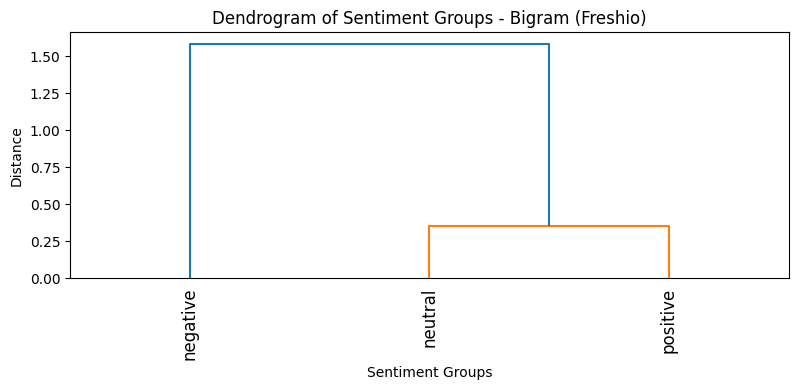

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Assuming df2 is your DataFrame and it contains the 'sentiment' and 'cleansed_comments' columns

# Create the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=1000, stop_words='english')

# Fit the TF-IDF vectorizer on all cleansed comments to get consistent feature space
tfidf_vectorizer.fit(df2['cleansed_comments'])

# Transform the merged comments for each sentiment group
tfidf_matrices = [tfidf_vectorizer.transform([comments]) for comments in sentiment_groups.values()]

# Compute a distance matrix between the TF-IDF vectors of each sentiment group
from sklearn.metrics.pairwise import cosine_distances

# Stack all group vectors into a single matrix for distance computation
tfidf_matrix_stack = np.vstack([tfidf_matrix.toarray() for tfidf_matrix in tfidf_matrices])

# Compute cosine distances (1 - cosine_similarity) between TF-IDF vectors
distance_matrix = cosine_distances(tfidf_matrix_stack)

# Perform hierarchical clustering
Z = linkage(distance_matrix, 'ward')

# Plot the dendrogram
plt.figure(figsize=(8, 4))
dendrogram(Z, labels=list(sentiment_groups.keys()), leaf_rotation=90)
plt.title('Dendrogram of Sentiment Groups - Bigram (Freshio)')
plt.xlabel('Sentiment Groups')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


### ChatGPT inference
#### Positive Sentiment:
Keywords: gelato, uncle (uncl), flavour, friendly, cream, ice, try, good, owner, super

Likely Topic: Gelato Experience and Positive Impressions

Inferences: The review focuses on a positive gelato experience, mentioning the friendly service, various flavors, and creaminess. The reviewer appreciates trying different flavors and highlights the friendliness of the staff and the overall goodness of the gelato.


#### Neutral Sentiment:
Keywords: gelato, friendly, cream, flavour, ice, uncle (uncl), try, amazing (amaz), general (gener), taste

Likely Topic: Gelato Experience and Neutral Impressions

Inferences: The review provides a neutral perspective on the gelato experience, highlighting aspects such as friendliness, flavors, and tasting. The reviewer tries various flavors and acknowledges the friendliness of the staff, without strongly expressing either positive or negative sentiment.

#### Negative Sentiment:

Keywords: gelato, flavor, flavour, sample (sampl), friendly, delicious (delici), choice (choic), owner, come, really (realli)

Likely Topic: Gelato Experience and Negative Aspects

Inferences: The review expresses a negative sentiment related to the gelato experience. It mentions issues with flavors, possibly not finding them appealing or satisfactory. The reviewer may have sampled different flavors but didn't find them delicious. Additionally, there may be concerns about choices, the owner, or other aspects of the gelato shop that were not satisfactory.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

sentiment_groups = df2.groupby('sentiment')['cleansed_comments'].apply(lambda x: ' '.join(x)).to_dict()

# Create the TF-IDF vectorizer with bigrams
tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=1000, stop_words='english', ngram_range=(2, 2))  # Adjust ngram_range

# Get the top n phrases for each review
top_n = 10
res_grp = {
    'positive': [],
    'neutral': [],
    'negative': []
}

# Iterate through sentiment_groups and extract top phrases
for sentiment, comments in sentiment_groups.items():
    # Fit and transform the merged comments for each sentiment group
    tfidf_matrix = tfidf_vectorizer.fit_transform([comments])
    feature_names = tfidf_vectorizer.get_feature_names_out()

    # Get the top phrases
    feature_index = tfidf_matrix[0, :].nonzero()[1]
    tfidf_scores = zip(feature_index, [tfidf_matrix[0, x] for x in feature_index])
    top_phrases = [feature_names[i] for i, _ in sorted(tfidf_scores, key=lambda x: x[1], reverse=True)[:top_n]]

    # Append the top phrases to the corresponding sentiment group in res_grp
    res_grp[sentiment.lower()].append(top_phrases)

# Display the top phrases for each sentiment group
for sentiment, top_phrases_list in res_grp.items():
    print(f"Sentiment: {sentiment.capitalize()}")
    for i, phrases in enumerate(top_phrases_list):
        print(f"Top Phrases for review {i+1}: {', '.join(phrases)}")
    print('\n')


Sentiment: Positive
Top Phrases for review 1: ice cream, uncl aunti, super friendli, let tri, friendli uncl, best gelato, friendli owner, highli recommend, uncl friendli, dark chocol


Sentiment: Neutral
Top Phrases for review 1: ice cream, friendli uncl, friendli owner, definit come, delici gelato, uncl aunti, cream tast, owner friendli, let tast, gelato delici


Sentiment: Negative
Top Phrases for review 1: gelato master, local gelato, know local, pride know, beam pride, help beam, gelato help, make gelato, art make, master art




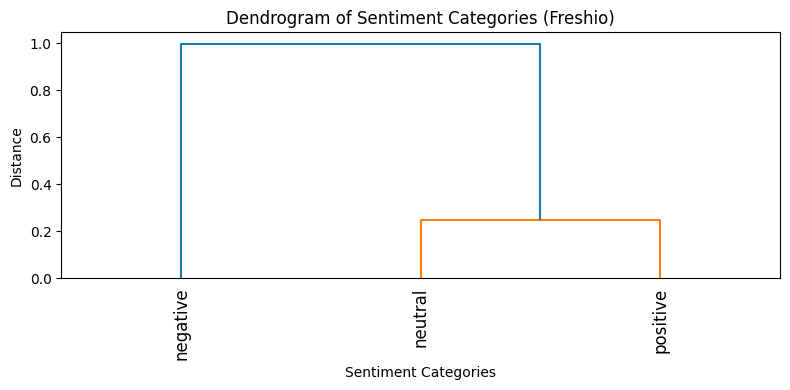

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df2 is your DataFrame and 'cleansed_comments' & 'sentiment' are columns in df2

# Create the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=1000, stop_words='english')

# Fit the TF-IDF vectorizer on all cleansed comments to get consistent feature space
tfidf_vectorizer.fit(df2['cleansed_comments'])

# Create an empty DataFrame to hold the feature space for each sentiment
tfidf_feature_df = pd.DataFrame(columns=tfidf_vectorizer.get_feature_names_out())

# Iterate through sentiment_groups and create a TF-IDF row for each
for sentiment, comments in sentiment_groups.items():
    # Transform the merged comments for each sentiment group
    tfidf_vector = tfidf_vectorizer.transform([comments])
    tfidf_feature_df.loc[sentiment] = tfidf_vector.toarray().flatten()

# Now tfidf_feature_df contains the TF-IDF scores for each sentiment's top phrases

# Calculate the pairwise distance matrix using cosine distance (1 - cosine similarity)
distance_matrix = pdist(tfidf_feature_df, 'cosine')

# Perform Hierarchical Clustering
Z = linkage(distance_matrix, 'ward')  # You can use other methods like 'average', 'complete', etc.

# Create the Dendrogram
plt.figure(figsize=(8, 4))
dendrogram(Z, labels=tfidf_feature_df.index, leaf_rotation=90, leaf_font_size=12)
plt.title('Dendrogram of Sentiment Categories (Freshio)')
plt.xlabel('Sentiment Categories')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Assuming df2 is your DataFrame and it contains the 'sentiment' and 'cleansed_comments' columns

# Group by 'sentiment' and join the cleansed comments
sentiment_groups = df2.groupby('sentiment')['cleansed_comments'].apply(lambda x: ' '.join(x)).to_dict()

# Create the TF-IDF vectorizer with bigrams
tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=1000, stop_words='english', ngram_range=(2, 2))

# DataFrame to hold the top phrases and their scores
df_top_phrases = pd.DataFrame()

# Get the top n bigrams for each sentiment
top_n = 10

# Iterate through sentiment_groups and extract top bigrams
for sentiment, comments in sentiment_groups.items():
    # Fit and transform the merged comments for each sentiment group
    tfidf_matrix = tfidf_vectorizer.fit_transform([comments])
    feature_names = tfidf_vectorizer.get_feature_names_out()

    # Get the top bigrams and their scores
    feature_index = tfidf_matrix[0, :].nonzero()[1]
    tfidf_scores = [(feature_names[i], tfidf_matrix[0, x]) for i, x in zip(feature_index, feature_index)]

    # Sort by score and get top n
    top_phrases_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)[:top_n]

    # Append to DataFrame
    df_top_phrases[sentiment.capitalize() + ' Word'] = [phrase for phrase, score in top_phrases_scores]
    df_top_phrases[sentiment.capitalize() + ' Score'] = [score for phrase, score in top_phrases_scores]

# Transpose the DataFrame so each sentiment category is a column
df_top_phrases_transposed = df_top_phrases.T

# Output the DataFrame
print(df_top_phrases)
#print(df_top_phrases_transposed)


   Negative Word  Negative Score    Neutral Word  Neutral Score  \
0  gelato master        0.152499       ice cream       0.527168   
1   local gelato        0.152499   friendli uncl       0.166474   
2     know local        0.152499  friendli owner       0.138728   
3     pride know        0.152499    definit come       0.110983   
4     beam pride        0.152499   delici gelato       0.110983   
5      help beam        0.152499      uncl aunti       0.110983   
6    gelato help        0.152499      cream tast       0.083237   
7    make gelato        0.152499  owner friendli       0.083237   
8       art make        0.152499        let tast       0.083237   
9     master art        0.152499   gelato delici       0.083237   

      Positive Word  Positive Score  
0         ice cream        0.746885  
1        uncl aunti        0.325069  
2    super friendli        0.174144  
3           let tri        0.139315  
4     friendli uncl        0.131576  
5       best gelato        0.10835

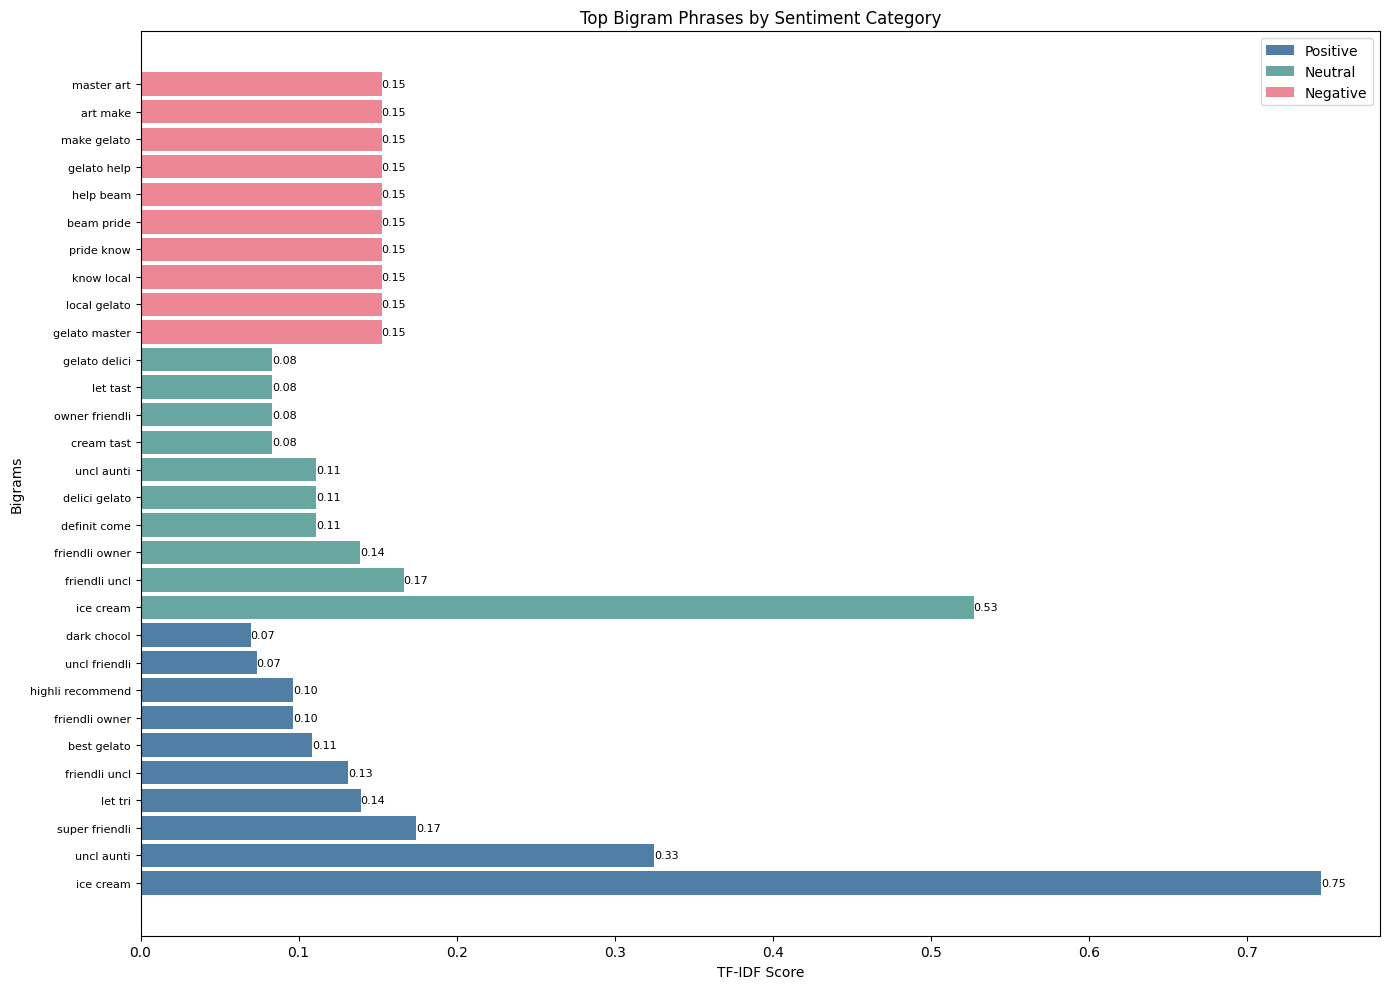

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_top_phrases is already created and structured correctly as per the above code

# Set the number of top phrases (bigrams) for each sentiment
top_n = 10

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(14, 10))

# Colors for different sentiments
colors = ['#517ea4', '#68a7a1', '#ed8796']  # Darker pastel blue, green, pink

# Iterate over each sentiment to plot the bars
bigram_labels = []  # This will store all bigram labels for y-ticks
current_position = 0  # Initialize the position for the first sentiment's bars

for i, sentiment in enumerate(['Positive', 'Neutral', 'Negative']):
    # Select the bigrams and their scores for the current sentiment
    bigrams = df_top_phrases[sentiment + ' Word']
    scores = df_top_phrases[sentiment + ' Score']
    y_pos = np.arange(current_position, current_position + len(bigrams))

    # Plot the bars for the current sentiment's bigrams
    bars = ax.barh(y_pos, scores, height=0.85, label=sentiment, color=colors[i])

    # Annotate the bars with the score
    for bar, score in zip(bars, scores):
        ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{score:.2f}',
                va='center', ha='left', fontsize=8)

    # Update the bigram labels list and the current position
    bigram_labels.extend(bigrams)
    current_position += len(bigrams)

# Set the y-tick labels
ax.set_yticks(np.arange(top_n * 3))  # Total number of bars is top_n times the number of sentiments
ax.set_yticklabels(bigram_labels, fontsize=8)

# Set the labels and title of the plot
ax.set_xlabel('TF-IDF Score')
ax.set_ylabel('Bigrams')
ax.set_title('Top Bigram Phrases by Sentiment Category')

# Add a legend
ax.legend()

# Show the plot with a tight layout
plt.tight_layout()
plt.show()

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.util import ngrams
import string

# Define a function for text preprocessing with bigrams or trigrams
def preprocess_text_with_ngrams(text, n=2):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove punctuation and numbers
    tokens = [word.lower() for word in tokens if word.isalpha()]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Generate n-grams (bigrams or trigrams)
    n_grams = ngrams(tokens, n)
    n_grams = [' '.join(gram) for gram in n_grams]

    return ' '.join(n_grams)

# Apply preprocessing with bigrams or trigrams to the 'cleansed_comments' column
df2['preprocessed_comments_ngrams'] = df2['cleansed_comments'].apply(lambda x: preprocess_text_with_ngrams(x, n=2))  # for bigrams
# or
df2['preprocessed_comments_ngrams'] = df2['cleansed_comments'].apply(lambda x: preprocess_text_with_ngrams(x, n=3))  # for trigrams


<ipython-input-48-c895de07ab1f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['preprocessed_comments_ngrams'] = df2['cleansed_comments'].apply(lambda x: preprocess_text_with_ngrams(x, n=2))  # for bigrams
<ipython-input-48-c895de07ab1f>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['preprocessed_comments_ngrams'] = df2['cleansed_comments'].apply(lambda x: preprocess_text_with_ngrams(x, n=3))  # for trigrams


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer instance for bigrams or trigrams
vectorizer_ngrams = CountVectorizer(max_df=0.95, min_df=2, stop_words='english', ngram_range=(2, 2))  # for bigrams
# or
#vectorizer_ngrams = CountVectorizer(max_df=0.95, min_df=2, stop_words='english', ngram_range=(3, 3))  # for trigrams

# Create the document-term matrix with bigrams or trigrams
dtm_ngrams = vectorizer_ngrams.fit_transform(df2['preprocessed_comments_ngrams'])


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# Set the number of topics
num_topics = 3  # Adjust as needed

# Create the LDA model for bigrams or trigrams
lda_ngrams = LatentDirichletAllocation(n_components=num_topics, random_state=42)

# Fit the LDA model to the document-term matrix with bigrams or trigrams
lda_ngrams.fit(dtm_ngrams)

# Display the topics and associated words for bigrams or trigrams
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print()

# Set the number of top words for each topic
no_top_words = 10  # Adjust as needed

# Display the topics and associated words for bigrams or trigrams
feature_names_ngrams = vectorizer_ngrams.get_feature_names_out()
display_topics(lda_ngrams, feature_names_ngrams, no_top_words)


Topic 1:
uncl aunti, aunti uncl, gener sampl, delici gelato, aunti friendli, gelato shop, sampl gener, mani flavour, rum raisin, best gelato

Topic 2:
ice cream, cream ice, friendli uncl, friendli owner, dark chocol, super friendli, uncl friendli, uncl aunti, tri tri, cream cream

Topic 3:
uncl aunti, ice cream, tri tri, coupl run, aunti uncl, super friendli, gelato place, friendli uncl, good gelato, gelato super



<ipython-input-52-ebd928bedca1>:18: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dist_matrix, 'average')  # 'average' linkage can be used or 'ward'


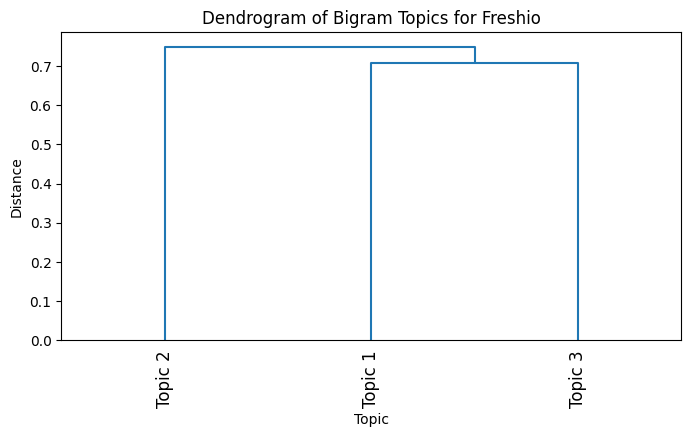

In [ ]:
from scipy.spatial.distance import jensenshannon
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Assuming you have the LDA model fitted with bigrams `lda_ngrams`
# and the feature names from the bigrams vectorizer `feature_names_ngrams`

# 1. Compute Topic Distribution
topic_word_distributions = lda_ngrams.components_ / lda_ngrams.components_.sum(axis=1)[:, np.newaxis]

# 2. Calculate Distance Matrix
dist_matrix = np.zeros((num_topics, num_topics))
for i in range(num_topics):
    for j in range(num_topics):
        dist_matrix[i, j] = jensenshannon(topic_word_distributions[i], topic_word_distributions[j])

# 3. Perform Hierarchical Clustering
Z = linkage(dist_matrix, 'average')  # 'average' linkage can be used or 'ward'

# 4. Create the Dendrogram
plt.figure(figsize=(8, 4))
dendrogram(
    Z,
    labels=[f'Topic {i+1}' for i in range(num_topics)],
    leaf_rotation=90,
)
plt.title('Dendrogram of Bigram Topics for Freshio')
plt.xlabel('Topic')
plt.ylabel('Distance')
plt.show()


In [ ]:
import pandas as pd

# Assuming `dtm_ngrams` is your document-term matrix
# and `vectorizer_ngrams` is the vectorizer you used to create the dtm_ngrams

# Set the number of top words for each topic
no_top_words = 10

# Create a DataFrame to hold the scored words
df_topics_ngrams = pd.DataFrame()

# Get the feature names (bigrams or trigrams)
feature_names_ngrams = vectorizer_ngrams.get_feature_names_out()

# Get the sorted topic components, needed to fetch the score
sorted_topic_components = lda_ngrams.components_.argsort(axis=1)

# Extract the top words and their scores for each topic
for topic_idx, topic in enumerate(lda_ngrams.components_):
    scores = topic[sorted_topic_components[topic_idx, -no_top_words:]][::-1]
    words = [feature_names_ngrams[i] for i in sorted_topic_components[topic_idx, -no_top_words:]][::-1]

    df_topics_ngrams[f'Topic {topic_idx + 1} score'] = scores
    df_topics_ngrams[f'Topic {topic_idx + 1} word'] = words

# Transpose the DataFrame so each topic is a column
df_transposed_ngrams = df_topics_ngrams.T
#df_transposed_ngrams
df_topics_ngrams

,Topic 1 score,Topic 1 word,Topic 2 score,Topic 2 word,Topic 3 score,Topic 3 word
0,87.230424,uncl aunti,376.676815,ice cream,48.162033,uncl aunti
1,43.832336,aunti uncl,182.319728,cream ice,30.974282,ice cream
2,41.296834,gener sampl,38.479078,friendli uncl,27.452951,tri tri
3,25.123378,delici gelato,36.396006,friendli owner,27.307008,coupl run
4,23.321779,aunti friendli,34.188940,dark chocol,27.077766,aunti uncl
5,22.907763,gelato shop,34.070714,super friendli,23.029493,super friendli
6,22.304103,sampl gener,32.921116,uncl friendli,22.589160,gelato place
7,21.541317,mani flavour,30.607542,uncl aunti,21.190465,friendli uncl
8,21.406652,rum raisin,29.788767,tri tri,20.261836,good gelato
9,21.222965,best gelato,27.305624,cream cream,19.238783,gelato super


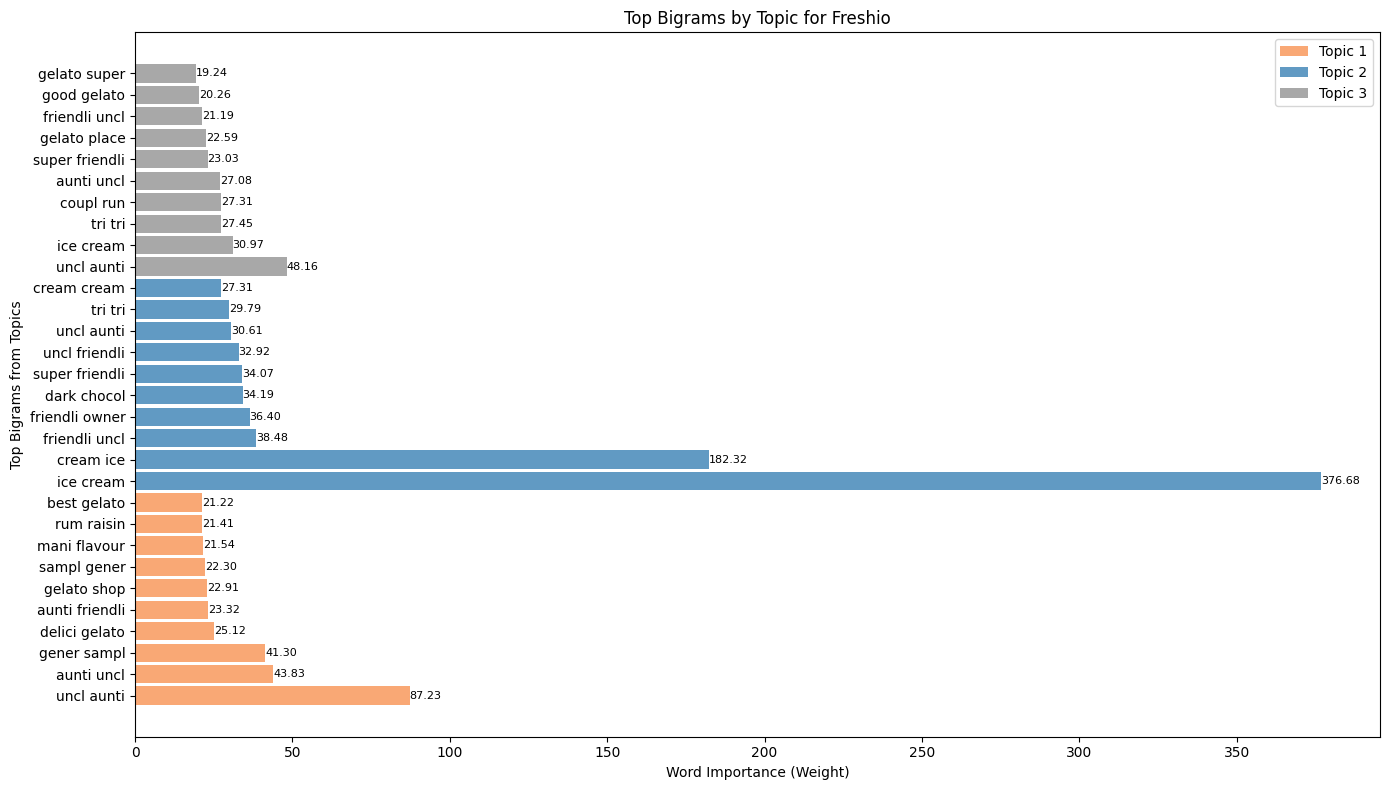

In [ ]:
# Extract feature names (bigrams) from the vectorizer
feature_names_ngrams = vectorizer_ngrams.get_feature_names_out()

# Create a DataFrame to hold the scored words for each topic
df_topics_ngrams = pd.DataFrame()

# Extract the top words and their scores for each topic
for topic_idx, topic_components in enumerate(lda_ngrams.components_):
    # Sort the indices of the topic components in descending order of weights
    top_indices = topic_components.argsort()[::-1][:no_top_words]

    # Get the top words and their corresponding weights
    top_features = [feature_names_ngrams[i] for i in top_indices]
    top_weights = topic_components[top_indices]

    # Add the top words and weights to the DataFrame
    df_topics_ngrams[f'Topic {topic_idx} Words'] = top_features
    df_topics_ngrams[f'Topic {topic_idx} Weights'] = top_weights

# Transpose the DataFrame to have topics as columns
df_topics_ngrams = df_topics_ngrams.T

fig, ax = plt.subplots(figsize=(14, 8))

# Width of the bars
bar_width = 0.85

# Colors for different topics, assuming three topics
colors = ['#f9a875', '#619ac3', '#a8a8a8']  # Orange, Blue, Grey

# Store the words and their positions for labeling on the y-axis
tick_labels = []
positions = []

# Starting position for the first topic's bars
current_position = 0

# Iterate over the topics to plot the bars
for topic_idx in range(lda_ngrams.n_components):
    # Get the top words and weights for the topic
    top_features = df_topics_ngrams.loc[f'Topic {topic_idx} Words'].values
    top_weights = df_topics_ngrams.loc[f'Topic {topic_idx} Weights'].values

    # Plotting the bars for the current topic's bigrams
    bars = ax.barh(current_position + np.arange(no_top_words), top_weights, height=bar_width, label=f'Topic {topic_idx + 1}', color=colors[topic_idx % len(colors)])

    # Annotating the bars with the score
    for bar, weight in zip(bars, top_weights):
        ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{weight:.2f}', va='center', ha='left', fontsize=8)

    # Add the words to the tick_labels list for the y-axis
    tick_labels.extend(top_features)

    # Update the positions for y-ticks
    positions.extend(current_position + np.arange(no_top_words))

    # Update the starting position for the next topic
    current_position += no_top_words

# Set the y-ticks to be in the middle of the bars for each topic
ax.set_yticks(positions)
ax.set_yticklabels(tick_labels)

# Set the labels and title of the plot
ax.set_xlabel('Word Importance (Weight)')
ax.set_ylabel('Top Bigrams from Topics')
ax.set_title('Top Bigrams by Topic for Freshio')

# Add a legend to identify the topics
ax.legend()

# Show the plot with a tight layout
plt.tight_layout()
plt.show()



### Bi-gram analysis
#### Topic 1
- The sample serving was generous
- Customers found it delicious
- There were many flavours

#### Topic 2
- Uncle and Aunty are very friendly

#### Topic 3
- Nothing unique


## WordCloud

In [ ]:
from wordcloud import WordCloud

all_comments = ' '.join(df2['cleansed_comments'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

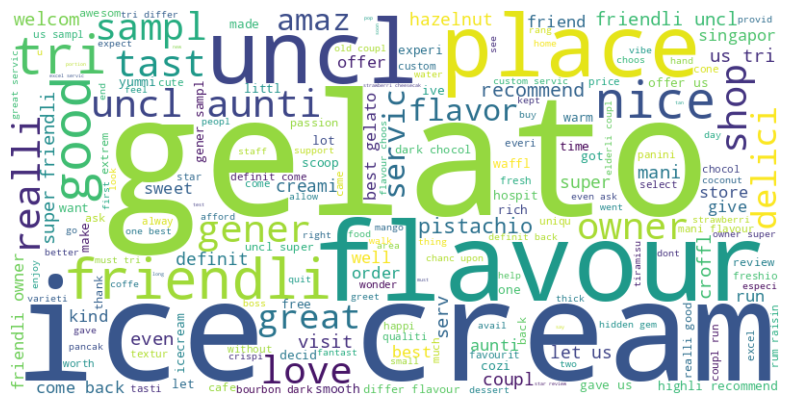

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()